In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
train_dir = r'D:\downloads\CV_tasks\Task_1\dogs_vs_cats\train'
test_dir = r'D:\downloads\CV_tasks\Task_1\dogs_vs_cats\test'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

Found 4024 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\fares\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

Epoch 1/10


c:\Users\fares\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 159s 779ms/step - accuracy: 0.5237 - loss: 0.6983 - val_accuracy: 0.6290 - val_loss: 0.6502
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.7500 - loss: 0.6365 - val_accuracy: 0.0000e+00 - val_loss: 0.8397
Epoch 3/10


c:\Users\fares\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


201/201 ━━━━━━━━━━━━━━━━━━━━ 112s 553ms/step - accuracy: 0.6234 - loss: 0.6532 - val_accuracy: 0.6450 - val_loss: 0.6133
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step - accuracy: 0.7000 - loss: 0.5181 - val_accuracy: 1.0000 - val_loss: 0.3279
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 101s 501ms/step - accuracy: 0.6530 - loss: 0.6160 - val_accuracy: 0.7020 - val_loss: 0.5742
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 174us/step - accuracy: 0.7000 - loss: 0.6307 - val_accuracy: 1.0000 - val_loss: 0.3900
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 111s 551ms/step - accuracy: 0.6886 - loss: 0.5827 - val_accuracy: 0.7420 - val_loss: 0.5212
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - accuracy: 0.7500 - loss: 0.4724 - val_accuracy: 1.0000 - val_loss: 0.4419
Epoch 9/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 127s 629ms/step - accuracy: 0.7292 - loss: 0.5402 - val_accuracy: 0.7440 - val_loss: 0.5320
Epoch 10/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 232us/step - accuracy: 0.8500 - loss: 0.3724 - va

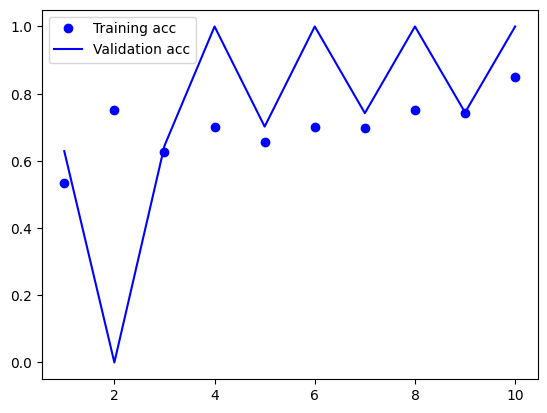

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

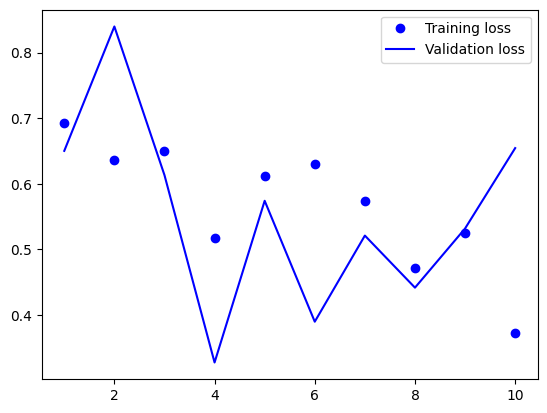

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [14]:
model.save('catvsdog.h5')

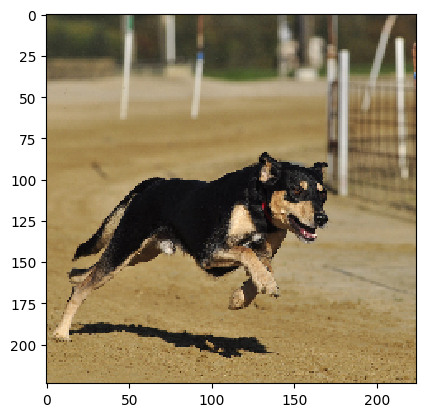

In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model(r'C:\Users\fares\OneDrive\Desktop\Tasks\IPTasks\imageClassification\catvsdog.h5')

# Define the image path
path = r'C:\Users\fares\OneDrive\Desktop\Tasks\IPTasks\imageClassification\test\1\270.jpg'

# Load the image
img = image.load_img(path, target_size=(224, 224))

# Display the image
plt.imshow(img, interpolation='nearest')
plt.show()


In [16]:
import numpy as np
# Convert the image to a numpy array
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [17]:

# Reshape the array to fit the model's input shape
img_array = img_array.reshape(1, 224, 224, 3)

In [18]:
# Make a prediction using the model
a = model.predict(img_array)
#print(a)

# Check the prediction and print 'dog' or 'cat'
if a[0][0] == 1:
    print('dog')
else:
    print('cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
dog
